In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('Gpa.csv')
df.head(10)

,Hours Studied Weekly,Class Participation Rate,Field of Study,Secondary School GPA,Hobby Activities,Employment Status,Online Research Hours,Student ID,Age,Hometown,Preferred Study Time,College GPA
0,6.77,85.24,Science,3.32,3,Unemployed,2.68,256811.0,22.0,Santa Ana,Afternoon,2.56
1,11.86,62.25,Engineering,3.34,3,Employed,16.84,878869.0,19.0,San Jose,Afternoon,3.05
2,0.58,94.29,Business,3.61,4,Unemployed,10.06,509916.0,22.0,San Francisco,Afternoon,2.89
3,19.35,53.94,Business,3.55,2,Employed,15.64,217307.0,22.0,San Francisco,NaN,3.19
4,38.79,73.80,Science,2.95,2,Employed,7.71,371517.0,22.0,Anaheim,Evening,3.40
5,11.26,71.82,Arts,2.21,0,Unemployed,18.38,223734.0,22.0,San Jose,Evening,2.86
6,26.79,93.12,Engineering,3.63,1,Unemployed,12.70,968826.0,21.0,San Jose,Evening,3.71
7,33.77,98.44,Arts,3.20,2,Employed,19.36,327809.0,25.0,Fresno,Afternoon,4.00
8,37.58,97.68,Arts,2.07,2,Employed,4.29,718662.0,24.0,San Jose,Evening,3.18
9,1.01,52.75,Business,3.58,0,Unemployed,10.68,685316.0,23.0,San Jose,Morning,2.47


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Hours Studied Weekly      1200 non-null   float64
 1   Class Participation Rate  1163 non-null   float64
 2   Field of Study            1200 non-null   object 
 3   Secondary School GPA      1200 non-null   float64
 4   Hobby Activities          1200 non-null   int64  
 5   Employment Status         1200 non-null   object 
 6   Online Research Hours     1200 non-null   float64
 7   Student ID                1087 non-null   float64
 8   Age                       1188 non-null   float64
 9   Hometown                  1200 non-null   object 
 10  Preferred Study Time      1103 non-null   object 
 11  College GPA               1200 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 112.6+ KB


In [16]:
print("Missing value before dropping: ")
print(df.isna().sum())

print("")
print("Missing value after dropping: ")
df.dropna(inplace=True)
print(df.isna().sum())

Missing value before dropping: 
Hours Studied Weekly          0
Class Participation Rate     37
Field of Study                0
Secondary School GPA          0
Hobby Activities              0
Employment Status             0
Online Research Hours         0
Student ID                  113
Age                          12
Hometown                      0
Preferred Study Time         97
College GPA                   0
dtype: int64

Missing value after dropping: 
Hours Studied Weekly        0
Class Participation Rate    0
Field of Study              0
Secondary School GPA        0
Hobby Activities            0
Employment Status           0
Online Research Hours       0
Student ID                  0
Age                         0
Hometown                    0
Preferred Study Time        0
College GPA                 0
dtype: int64


In [17]:
label_encorders = {}
for column in ['Field of Study', 'Employment Status', 'Preferred Study Time', 'Hometown']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encorders[column] = le

features = ['Hours Studied Weekly', 'Class Participation Rate', 'Secondary School GPA',
            'Hobby Activities', 'Employment Status', 'Online Research Hours', 'Age', 'Preferred Study Time']

target = 'College GPA'

X = df[features]
y = df[target]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}')

Training samples: 770, Testing samples: 193


In [19]:
# KNN Model
knn_model = KNeighborsRegressor(n_neighbors=5, metric = 'euclidean')
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
knn_r2_percentage = knn_r2 * 100

print(f"KNN Model - Mean Squared Error: {knn_mse:.3f}")
print(f"KNN Model - R-squared: {knn_r2:.3f}")
print(f"KNN Model - R-squared (percentage): {knn_r2_percentage:.2f}%")

KNN Model - Mean Squared Error: 0.034
KNN Model - R-squared: 0.873
KNN Model - R-squared (percentage): 87.28%


In [25]:
ann_model = Sequential([
    Dense(10, input_dim=X_train.shape[1], activation='relu'),
    Dense(1)
])
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
ann_predictions = ann_model.predict(X_test).flatten()
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)
ann_r2_percentage = ann_r2 * 100

print(f"ANN Model - Mean Squared Error: {ann_mse:.3f}")
print(f"ANN Model - R-squared: {ann_r2:.3f}")
print(f"ANN Model - R-squared (percentage): {ann_r2_percentage:.2f}%")

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
ANN Model - Mean Squared Error: 0.004
ANN Model - R-squared: 0.986
ANN Model - R-squared (percentage): 98.64%


In [ ]:
import numpy as np


num_runs = 10
r2_scores = []

for _ in range(num_runs):

    ann_model = Sequential([
        Dense(10, input_dim=X_train.shape[1], activation='relu'),
        Dense(1)
    ])

    ann_model.compile(optimizer='adam', loss='mean_squared_error')

    ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

    ann_predictions = ann_model.predict(X_test).flatten()

    ann_r2 = r2_score(y_test, ann_predictions)
    r2_scores.append(ann_r2)


mean_r2 = np.mean(r2_scores)
mean_r2_percentage = mean_r2 * 100

print(f"ANN Model - Average R-squared: {mean_r2:.3f}")
print(f"ANN Model - Average R-squared (percentage): {mean_r2_percentage:.2f}%")
print(f"ANN Model - Mean Squared Error: {ann_mse:.3f}")


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
ANN Model - Average R-squared: 0.990
ANN Model - Average R-squared (percentage): 98.96%
ANN Model - Mean Squared Error: 0.004


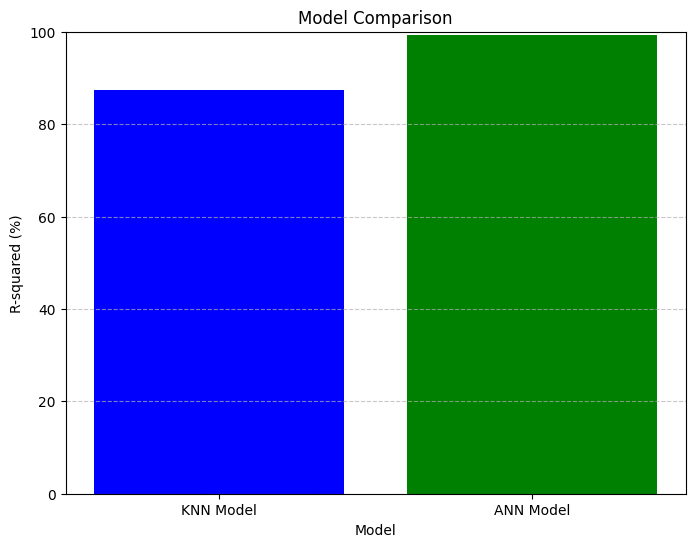

In [25]:
import matplotlib.pyplot as plt

# Data
models = ['KNN Model', 'ANN Model']
accuracies = [knn_accuracy, ann_accuracy]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


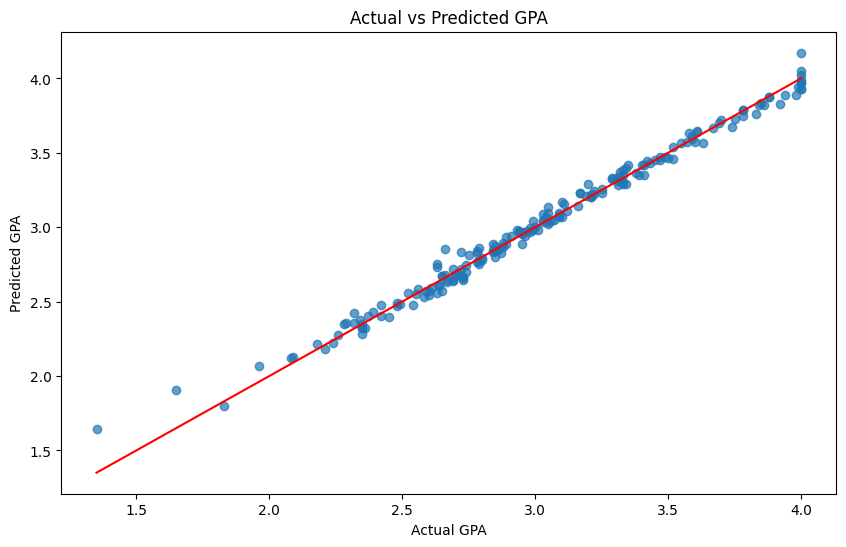

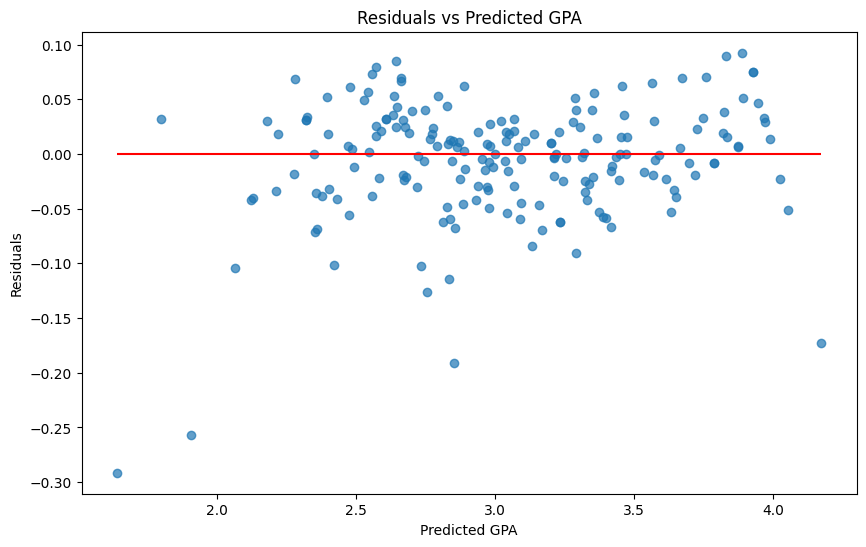

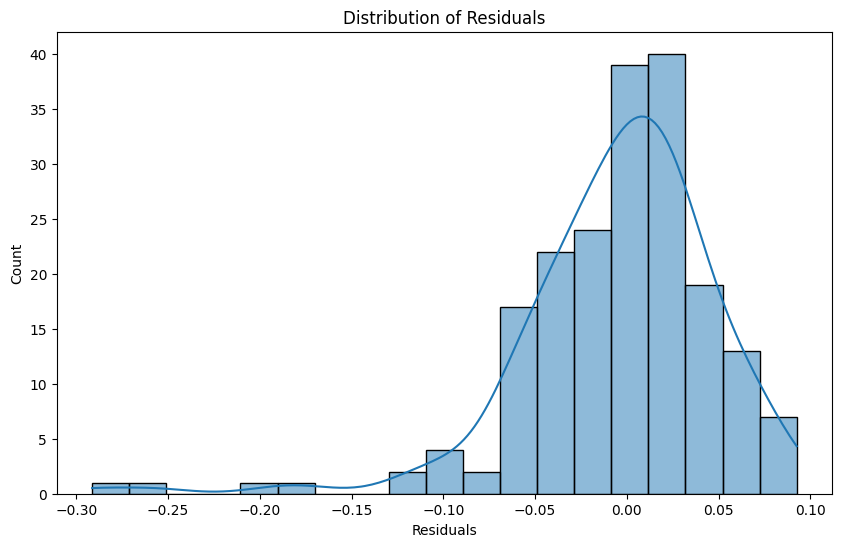

In [24]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ann_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Actual vs Predicted GPA')
plt.show()

# Residual plot
residuals = y_test - ann_predictions
plt.figure(figsize=(10, 6))
plt.scatter(ann_predictions, residuals, alpha=0.7)
plt.hlines(y=0, xmin=min(ann_predictions), xmax=max(ann_predictions), colors='red')
plt.xlabel('Predicted GPA')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted GPA')
plt.show()

# Distribution plot of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

   Hours Studied Weekly  Class Participation Rate Field of Study  \
0                  6.77                     85.24        Science   
1                 11.86                     62.25    Engineering   
2                  0.58                     94.29       Business   
3                 19.35                     53.94       Business   
4                 38.79                     73.80        Science   

   Secondary School GPA  Hobby Activities Employment Status  \
0                  3.32                 3        Unemployed   
1                  3.34                 3          Employed   
2                  3.61                 4        Unemployed   
3                  3.55                 2          Employed   
4                  2.95                 2          Employed   

   Online Research Hours  Student ID   Age       Hometown  \
0                   2.68    256811.0  22.0      Santa Ana   
1                  16.84    878869.0  19.0       San Jose   
2                  10.06    5

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ANN Model - R-squared: 0.288
ANN Model - R-squared (percentage): 28.84%

===== 1 =====
KNN Model - R-squared: 0.811
KNN Model - R-squared (percentage): 81.08%


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ANN Model - R-squared: 0.179
ANN Model - R-squared (percentage): 17.86%

===== 2 =====
KNN Model - R-squared: 0.747
KNN Model - R-squared (percentage): 74.72%


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ANN Model - R-squared: 0.439
ANN Model - R-squared (percentage): 43.95%

===== 3 =====
KNN Model - R-squared: 0.775
KNN Model - R-squared (percentage): 77.48%


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
ANN Model - R-squared: 0.565
ANN Model - R-squared (percentage): 56.46%


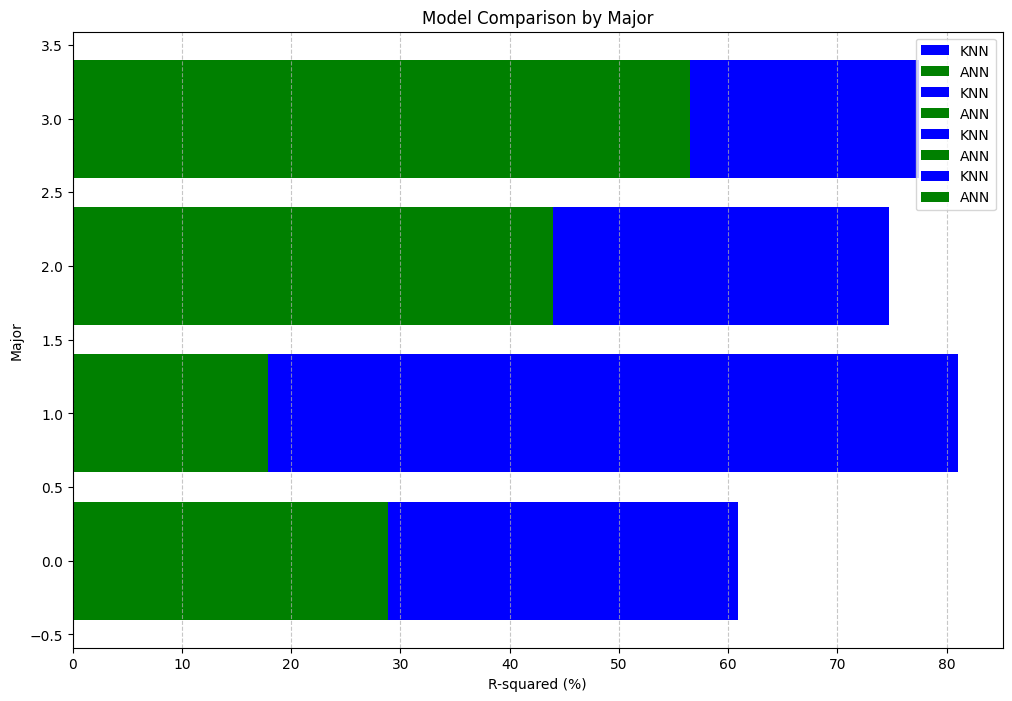

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Gpa.csv')

# Inspect the dataset
print(df.head())
print(df.info())

# Handle missing values
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for column in ['Field of Study', 'Employment Status', 'Preferred Study Time', 'Hometown']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Select relevant features and target
features = ['Hours Studied Weekly', 'Class Participation Rate', 'Secondary School GPA',
            'Hobby Activities', 'Employment Status', 'Online Research Hours', 'Age', 'Preferred Study Time']
target = 'College GPA'

# Group data by 'Field of Study'
grouped = df.groupby('Field of Study')

# Dictionary to store results for each major
results = {}

# Iterate over each major
for major, data in grouped:
    print(f"\n===== {major} =====")
    
    X = data[features]
    y = data[target]
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # KNN Model
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_r2 = r2_score(y_test, knn_predictions)
    knn_r2_percentage = knn_r2 * 100

    print(f"KNN Model - R-squared: {knn_r2:.3f}")
    print(f"KNN Model - R-squared (percentage): {knn_r2_percentage:.2f}%")

    # ANN Model
    ann_model = Sequential([
        Dense(10, input_dim=X_train.shape[1], activation='relu'),
        Dense(1)
    ])
    ann_model.compile(optimizer='adam', loss='mean_squared_error')
    ann_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    ann_predictions = ann_model.predict(X_test).flatten()
    ann_r2 = r2_score(y_test, ann_predictions)
    ann_r2_percentage = ann_r2 * 100

    print(f"ANN Model - R-squared: {ann_r2:.3f}")
    print(f"ANN Model - R-squared (percentage): {ann_r2_percentage:.2f}%")

    # Store results for the major
    results[major] = {'KNN R-squared': knn_r2_percentage, 'ANN R-squared': ann_r2_percentage}

# Visualize the results
plt.figure(figsize=(12, 8))
for major, result in results.items():
    plt.barh(major, result['KNN R-squared'], color='blue', label='KNN')
    plt.barh(major, result['ANN R-squared'], color='green', label='ANN')
plt.xlabel('R-squared (%)')
plt.ylabel('Major')
plt.title('Model Comparison by Major')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
